# Чтение данных

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

train = pd.read_csv("data/train.tsv.zip")
test = pd.read_csv("data/test.tsv")
sample_submission = pd.read_csv("data/sample_submission.tsv")

In [3]:
train['is_train']=1
test['is_train']=0
full_data = pd.concat([train.reset_index(),test.reset_index()], axis=0, sort=False).drop(['index'], axis=1)
full_data.shape

(74473, 67)

In [5]:
full_data.to_excel('fulldata.xlsx')

# Генерация фичей

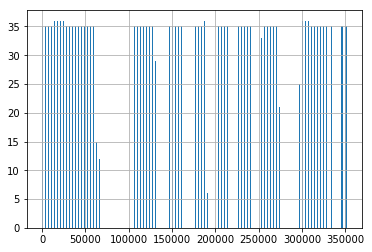

In [4]:
plt.show(full_data['Num'].hist(bins=10000))

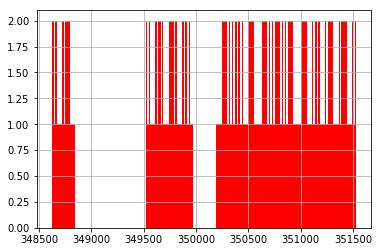

In [5]:
test['Num'].hist(bins=2016, color='red')
plt.show()

In [6]:
test['Num'].describe()

count      2016.000000
mean     350371.290675
std         806.372912
min      348622.000000
25%      349796.750000
50%      350520.500000
75%      351024.250000
max      351528.000000
Name: Num, dtype: float64

In [7]:
train['Num'].describe()

count     72457.000000
mean     178904.496129
std      103879.795910
min           0.000000
25%       89711.000000
50%      177658.000000
75%      270259.000000
max      349518.000000
Name: Num, dtype: float64

In [8]:
train.loc[train['Num']>348622]

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,is_train
72232,349294,2720,2015,2,1,20447918,820.0,1128.0,1801.0,1045.0,...,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,422.0,1
72233,349295,33182,2015,2,1,20447902,12585.0,11595.0,9685.0,12917.0,...,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,1
72234,349296,275825,2015,2,1,20447732,147287.0,176065.0,143105.0,202069.0,...,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0,54846.0,1
72235,349297,32835,2015,2,1,20443951,24420.0,27068.0,20460.0,25580.0,...,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0,7787.0,1
72236,349298,16,2015,2,1,20443944,5864.0,3310.0,1853.0,2836.0,...,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72452,349514,18978,2015,2,1,20438802,25348.0,28675.0,27643.0,22375.0,...,13358.0,11509.0,15202.0,10888.0,11925.0,14553.0,19053.0,16459.0,3696.0,1
72453,349515,18236,2015,2,1,20438801,23319.0,23061.0,18436.0,19390.0,...,11264.0,11216.0,11828.0,11922.0,11187.0,11494.0,16690.0,13141.0,3827.0,1
72454,349516,542,2015,2,1,20438734,515.0,795.0,426.0,745.0,...,135.0,215.0,145.0,390.0,400.0,253.0,268.0,208.0,175.0,1
72455,349517,4181,2015,2,1,20438733,5597.0,5595.0,4692.0,4753.0,...,2827.0,3108.0,3693.0,3467.0,2941.0,3757.0,6767.0,4491.0,515.0,1


In [9]:
train.loc[train['item_id'] ==20447918].sort_values(by=['Num'], ascending=False).head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,is_train
72232,349294,2720,2015,2,1,20447918,820.0,1128.0,1801.0,1045.0,...,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,422.0,1
72007,348397,2720,2015,2,2,20447918,960.0,820.0,1128.0,1801.0,...,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,1
71786,348176,679,2015,1,1,20447918,960.0,820.0,1128.0,1801.0,...,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,1
71560,347278,2720,2015,2,3,20447918,961.0,960.0,820.0,1128.0,...,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1
71339,347057,679,2015,1,2,20447918,961.0,960.0,820.0,1128.0,...,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1


In [10]:
((test.loc[test['item_id'] ==20447918]==2720).sum()>0).sum()

C:\Users\shcherbakov2-ia\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


0

In [11]:
test.max()

Num           351528.0
year            2015.0
week               5.0
shift              3.0
item_id     20453563.0
               ...    
f57          2679487.0
f58          2679487.0
f59          2679487.0
f60          2547676.0
is_train           0.0
Length: 66, dtype: float64

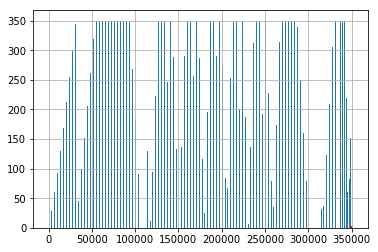

In [12]:
train['Num'].hist(bins=1000)
test['Num'].hist(bins=1000, color='red')
plt.show()

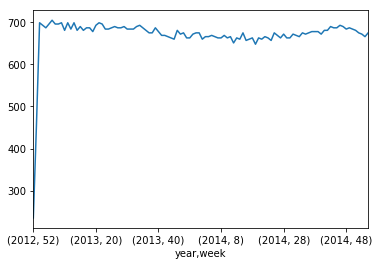

In [17]:
train.groupby(by=['year', 'week'])['Num'].count().plot()
plt.show()

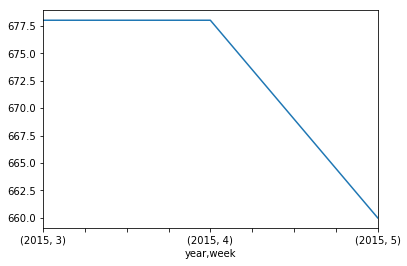

In [18]:
test.groupby(by=['year', 'week'])['Num'].count().plot()
plt.show()

# Разбиение на подвыборки

In [19]:
from sklearn.model_selection import train_test_split

dev,valid = train_test_split(full_data.loc[full_data['is_train']==1],test_size=0.3)

In [20]:
dev_y = dev['y']
dev_X = dev.drop(['y', 'is_train'],axis=1)

valid_y = valid['y']
valid_X = valid.drop(['y', 'is_train'],axis=1)

In [21]:
test_X = full_data.loc[full_data['is_train']==0].drop(['y', 'is_train'], axis=1)

# Построение модели

In [22]:
import lightgbm as lgbm
import numpy as np
from sklearn.metrics import mean_absolute_error

In [24]:
def smape(f,a):
    top = np.fabs(f-a)
    bot = (np.fabs(f) + np.fabs(a))/2
    return np.sum(100/len(a) * top/bot)

In [25]:
reg = lgbm.LGBMRegressor(objective='rmse', n_estimators=200)
reg.fit(dev_X, dev_y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=200, n_jobs=-1, num_leaves=31, objective='rmse',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
reg.evals_result_

In [27]:
valid_predictions = reg.predict(valid_X)
dev_predictions = reg.predict(dev_X)
print(smape(valid_predictions, valid_y))
print(smape(dev_predictions, dev_y))

39.618924323886134
39.576385334596246


In [28]:
test_predictions = reg.predict(test_X)

In [29]:
sample_submission['y']=test_predictions

In [36]:
import datetime
sample_submission.to_csv('submissions/submission_{}.csv'.format(datetime.datetime.now().strftime("%Y%m%d_%H%M%S")))